https://www.youtube.com/watch?v=2VwPnQeZNMA&list=PL4ho7ag3cJzU3O4taotUpFL6b1InP9vRs&index=1

In [1]:
import pandas as pd
import numpy as np
import itertools
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_rows", None)
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data= pd.read_csv("drugsComTrain_raw.csv")

In [3]:
data.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [4]:
data["condition"].value_counts().head()

Birth Control    28788
Depression        9069
Pain              6145
Anxiety           5904
Acne              5588
Name: condition, dtype: int64

In [5]:
df=data[(data["condition"]=="Birth Control")|(data["condition"]=="Depression")|(data["condition"]=="High Blood Pressure")|(data["condition"]==  "Diabetes, Type 2")]                                                                                                  

In [6]:
data.shape

(161297, 7)

In [7]:
df.shape

(42732, 7)

In [8]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [9]:
x= df.drop(["drugName","rating","date",'usefulCount',"uniqueID"],axis = 1)

# EDA

In [10]:
x.condition.value_counts()

Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [11]:
x.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [12]:
#Segregating dataframe or analyzing individual condition

x_birth = x[(x["condition"]== "Birth Control")]
x_dep = x[(x["condition"]== "Depression")]
x_bp = x[(x["condition"]== "High Blood Pressure")]
x_daib = x[(x["condition"]== "Diabetes, Type 2")]

In [13]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Word Count for Birth Control')

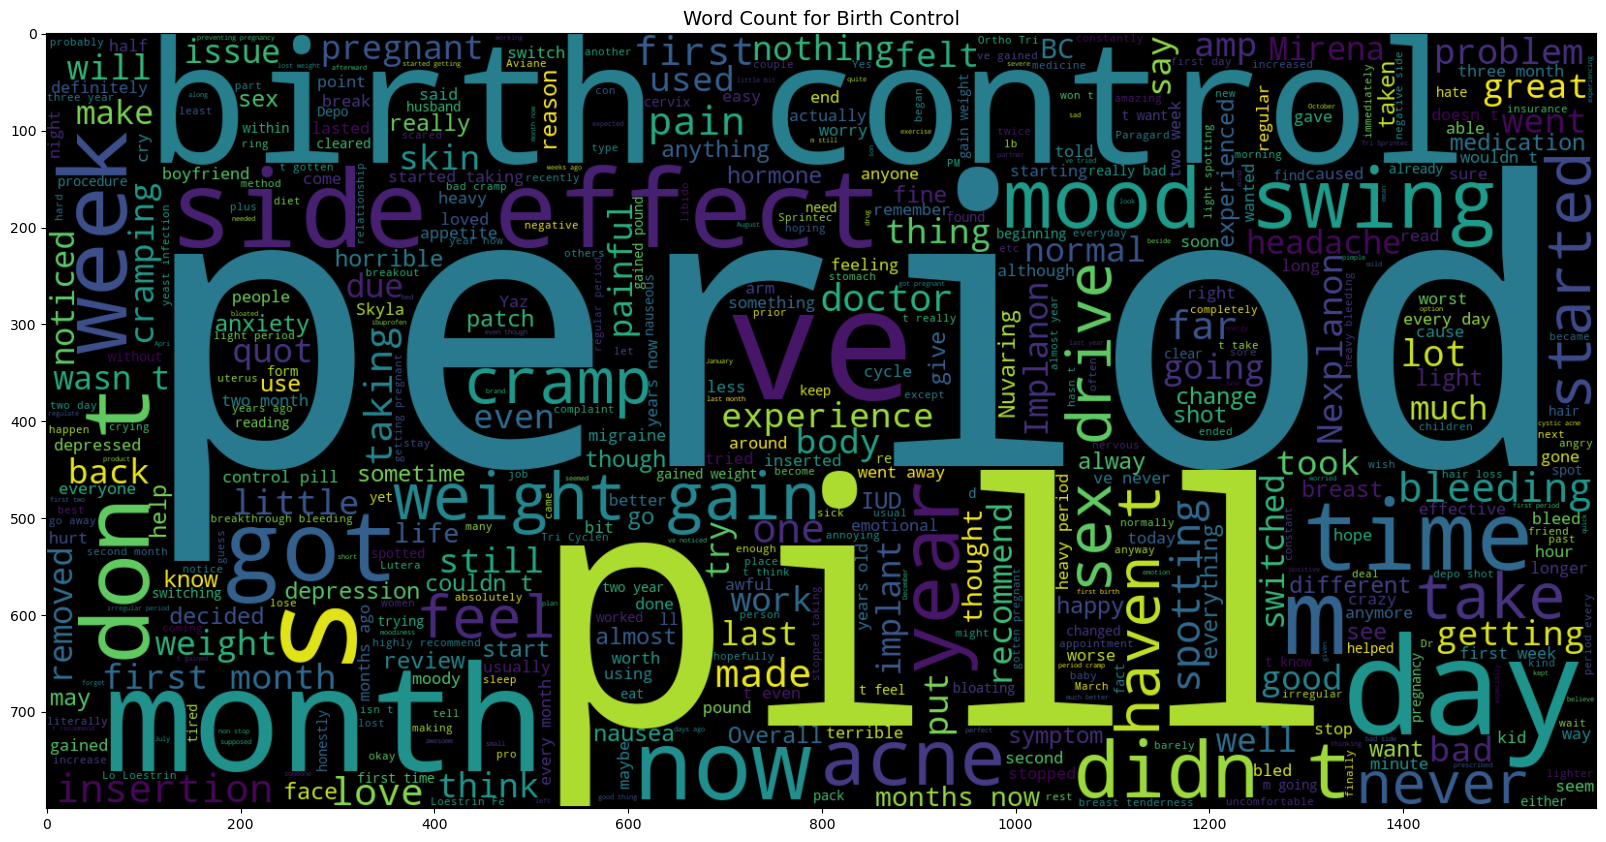

In [14]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words= 500, width =1600,height=800).generate(" ".join(x_birth.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Count for Birth Control", fontsize=14)

Text(0.5, 1.0, 'Word Count for Birth Control')

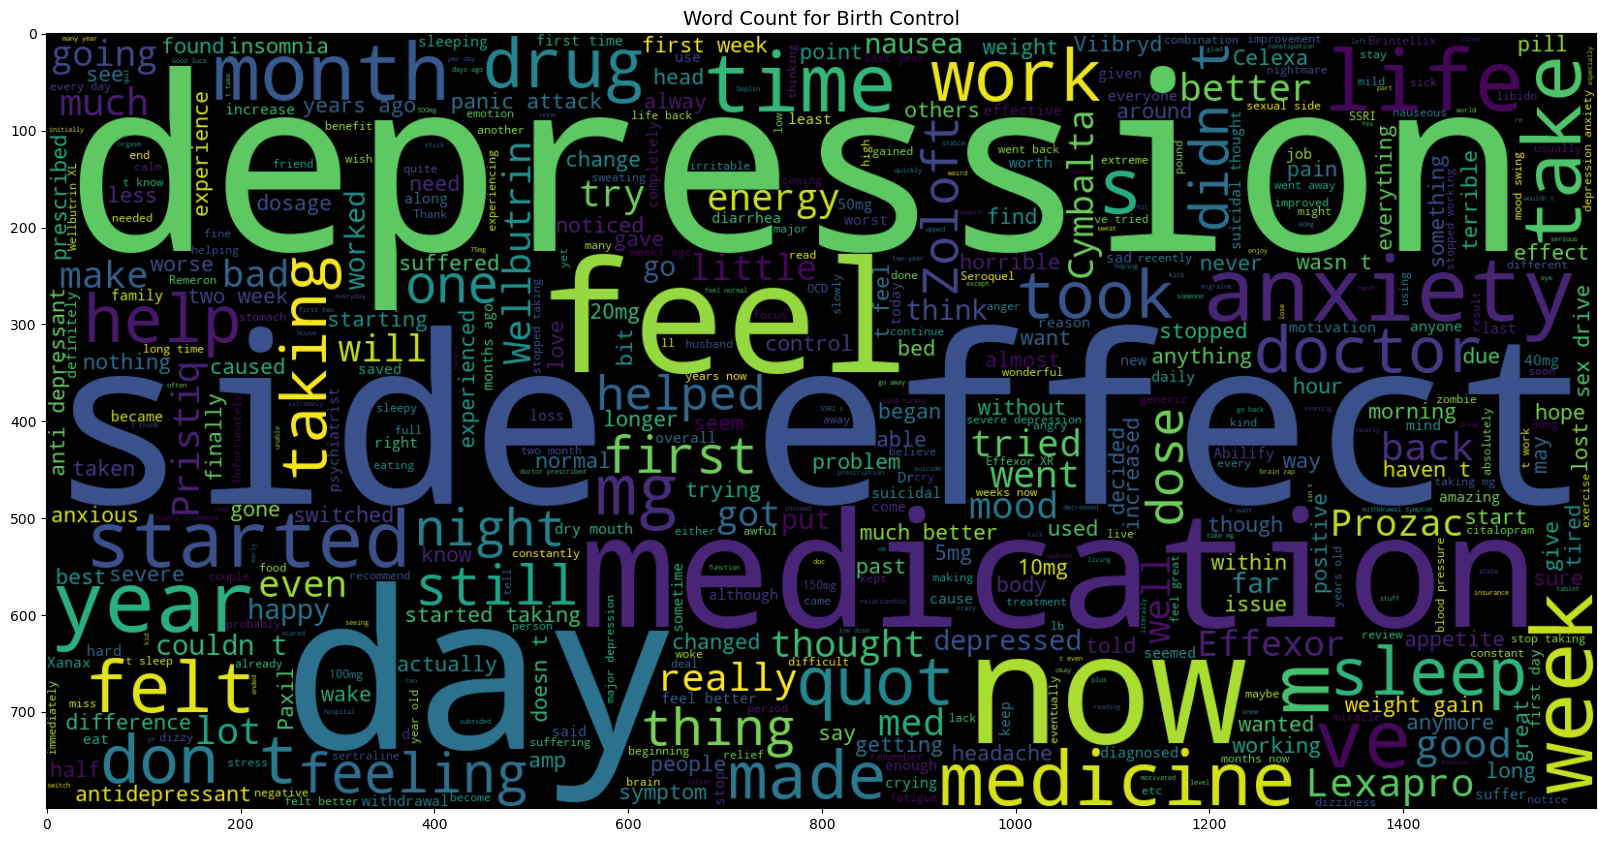

In [15]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words= 500, width =1600,height=800).generate(" ".join(x_dep.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Count for Birth Control", fontsize=14)

Text(0.5, 1.0, 'Word Count for Birth Control')

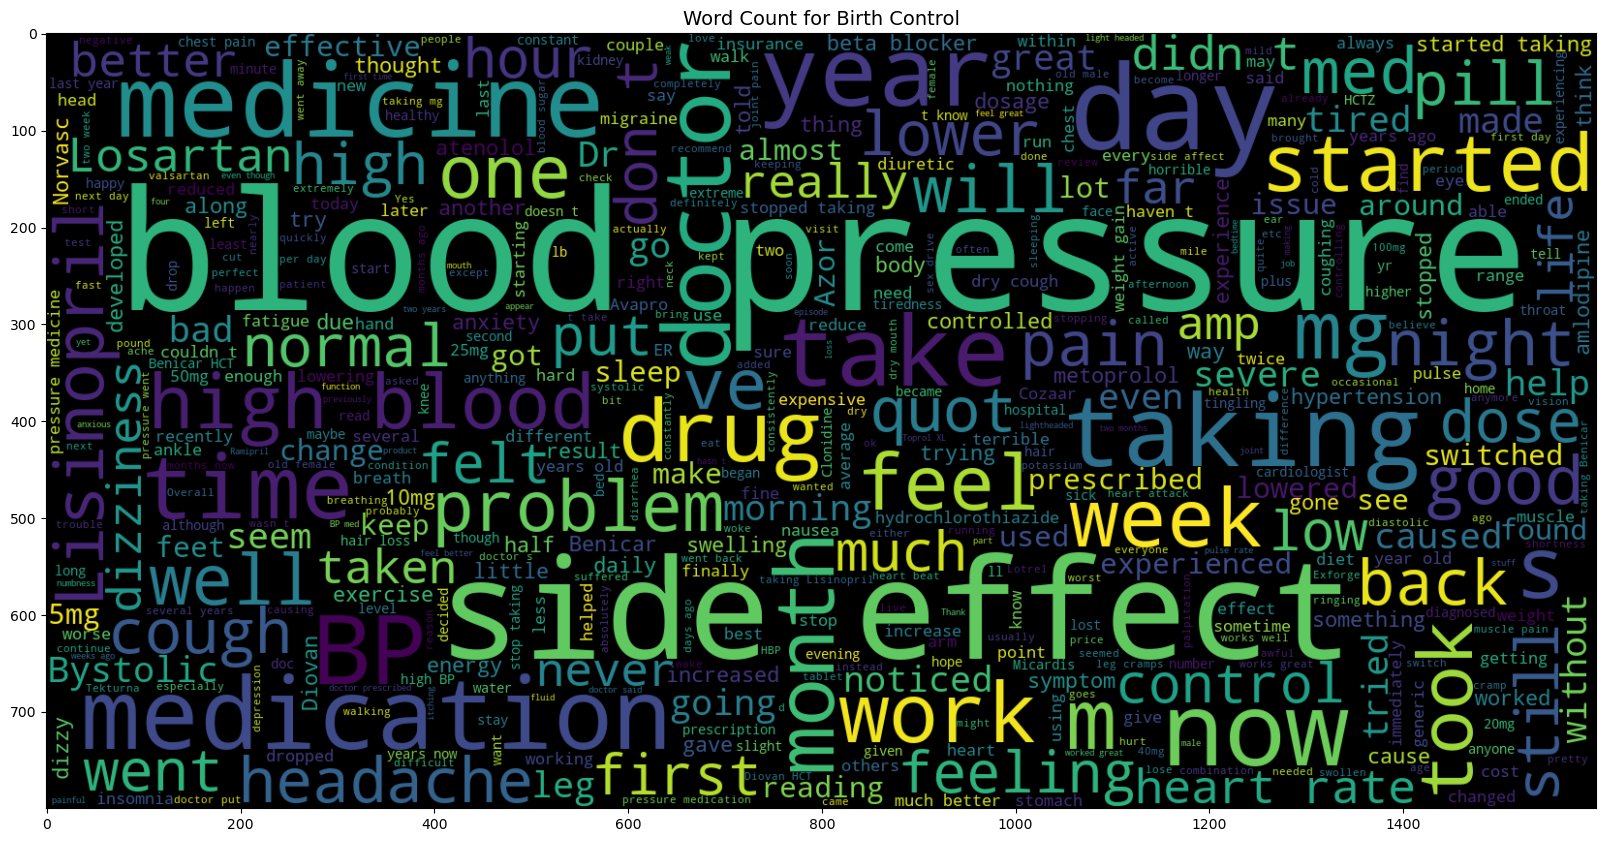

In [16]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words= 500, width =1600,height=800).generate(" ".join(x_bp.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Count for Birth Control", fontsize=14)

Text(0.5, 1.0, 'Word Count for Birth Control')

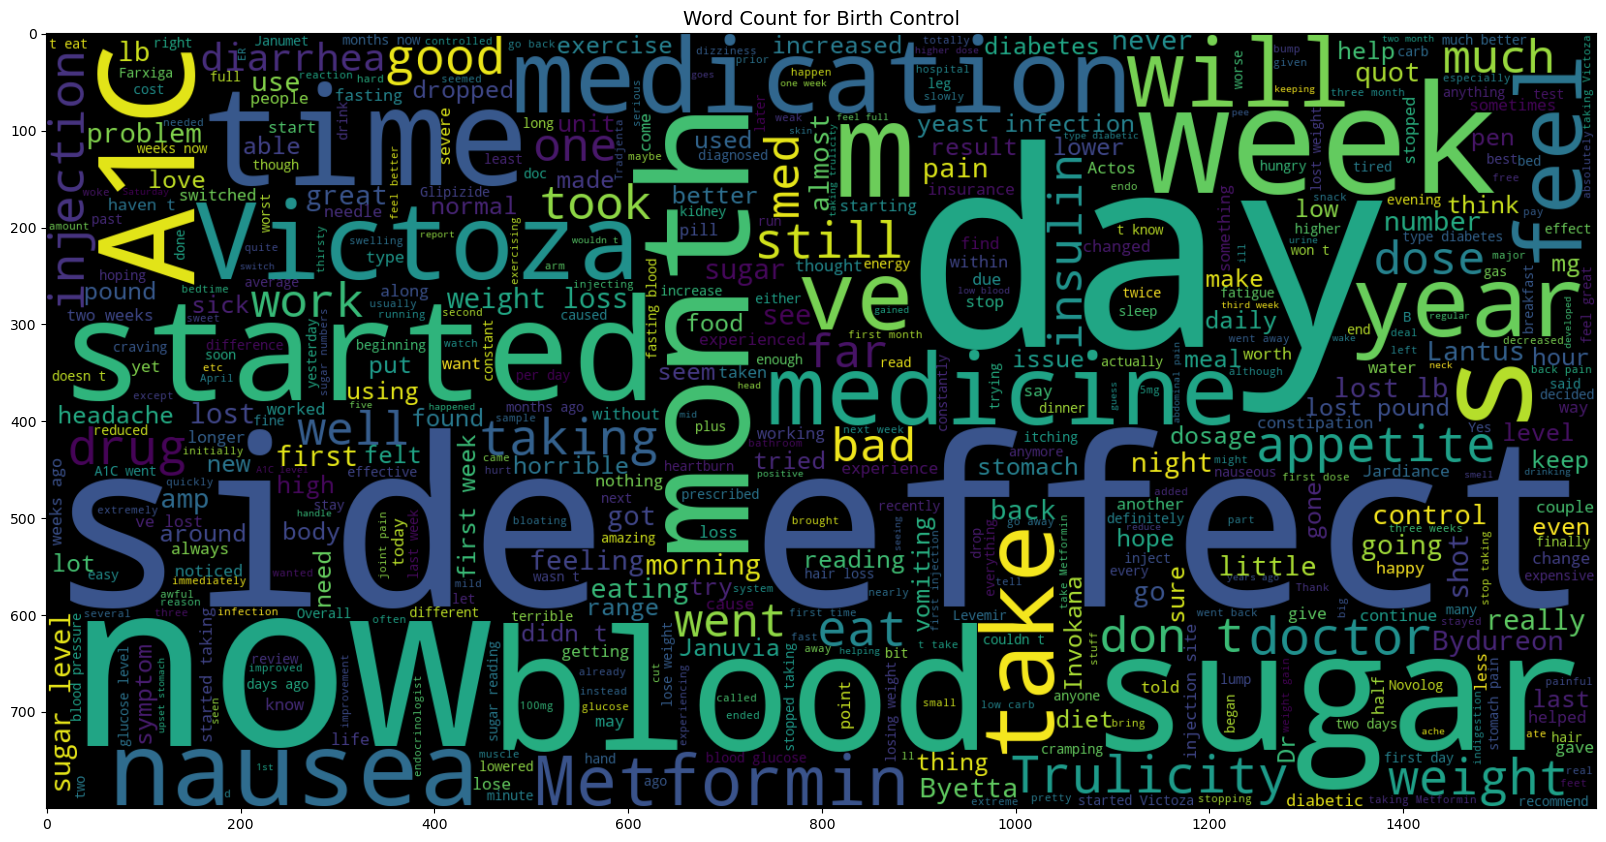

In [17]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words= 500, width =1600,height=800).generate(" ".join(x_daib.review))
plt.imshow(wc,interpolation='bilinear')
plt.title("Word Count for Birth Control", fontsize=14)

# Data Preprocessing

In [18]:
x["review"][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [19]:
for i,col in enumerate(x.columns):
    x.iloc[:,i]=x.iloc[:,i].str.replace('"',' ')

In [20]:
pd.set_option("max_colwidth",-1)

In [21]:
x.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  
2    I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                  
3    This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                       
9    I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                      
11   I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                      

# Removing StopWords

In [22]:
from nltk.corpus import stopwords

In [23]:
stop=stopwords.words("english")

In [24]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Normalisation

In [25]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re

In [26]:
lemmatizer=WordNetLemmatizer()

In [27]:
def review_to_words(raw_review):

    # Delete HTML
    review_txt = BeautifulSoup(raw_review,"html.parser").get_text()
    # make a Space
    letters_only= re.sub('[^a-zA-Z]'," ",review_txt)
    # Lower letters
    words= letters_only.lower().split()
    # StopWords
    meaningful_words = [w for w in words if not w in stop]
    # Lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # space join words
    return(" ".join(lemmitize_words))

In [28]:
x["review_clean"]=x["review"].apply(review_to_words)

In [29]:
x.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
2    I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                   
3    This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                        
9    I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                       
11   I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                  

# Creating Features and Traget Variable

In [30]:
X = x['review_clean']
y = x['condition']

# Train Test Split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify = y,test_size=0.2,random_state=2)

In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Bag of Words

In [33]:
count_vectorizer = CountVectorizer(stop_words="english")
count_train = count_vectorizer.fit_transform(x_train)
count_test = count_vectorizer.transform(x_test)

# Machine Learning Model - Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [35]:
mnb = MultinomialNB()
mnb.fit(count_train,y_train)

pred = mnb.predict(count_test)

In [36]:
accuracy_score(y_test,pred)

0.9723879723879724

Confusion matrix, without normalization


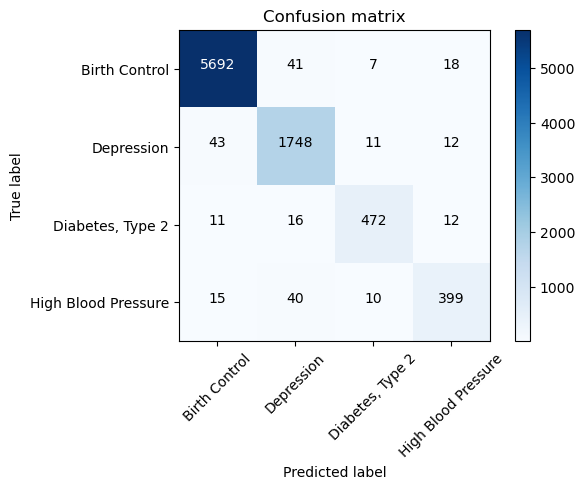

In [37]:
cm=metrics.confusion_matrix(y_test,pred,labels= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])
plot_confusion_matrix(cm, classes= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])

In [ ]:
# Machine Learning- Passive Aggressive Classifier

# Passive Aggressive is considered algorithms that perform online learning (with for example Twitter data). 
# Their characteristic is that they remain passive when dealing with an outcome that has been correctly classified, and become aggressive when a miscalculation takes place, thus constantly self-updating and adjusting.



In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression

In [42]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train,y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("Test_Accuracy", score)

Test_Accuracy 0.9778869778869779


Confusion matrix, without normalization


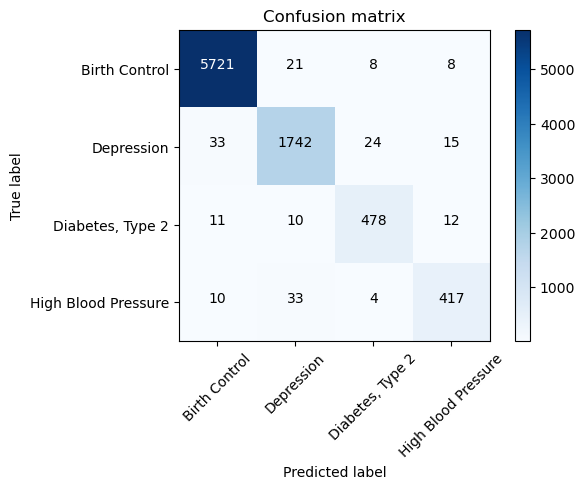

In [43]:
cm=metrics.confusion_matrix(y_test,pred,labels= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])
plot_confusion_matrix(cm, classes= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])

# TFIDF

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [82]:
tfidf_vectorizer=TfidfVectorizer(stop_words="english", max_df=0.8) # max_df will igonnre the word appering more than 80% in entire dataset. it means it is very common word 
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)


# Naive Bayes

Accuracy 0.9206739206739206
Confusion matrix, without normalization


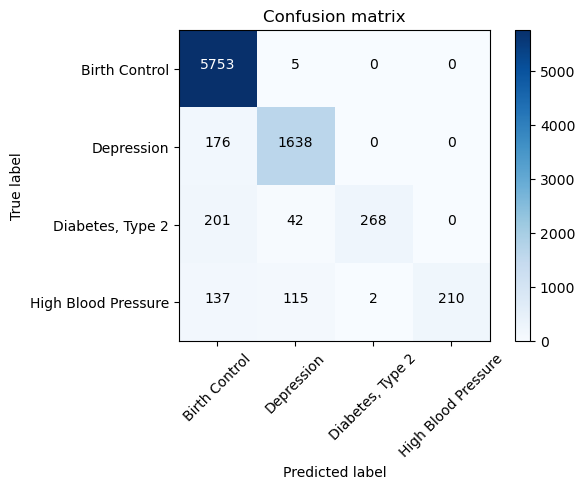

In [83]:
mnb = MultinomialNB()
mnb.fit(tfidf_train,y_train)

pred_tf = mnb.predict(tfidf_test)
score = accuracy_score(y_test,pred_tf)
print("Accuracy", score)

cm=metrics.confusion_matrix(y_test,pred_tf,labels= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])
plot_confusion_matrix(cm, classes= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])

# Passive Aggressive Classifer

In [84]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(count_train,y_train)
pred_ptf = pass_tf.predict(count_test)
score = metrics.accuracy_score(y_test,pred_ptf)
print("Test_Accuracy", score)

Test_Accuracy 0.9774189774189774


Confusion matrix, without normalization


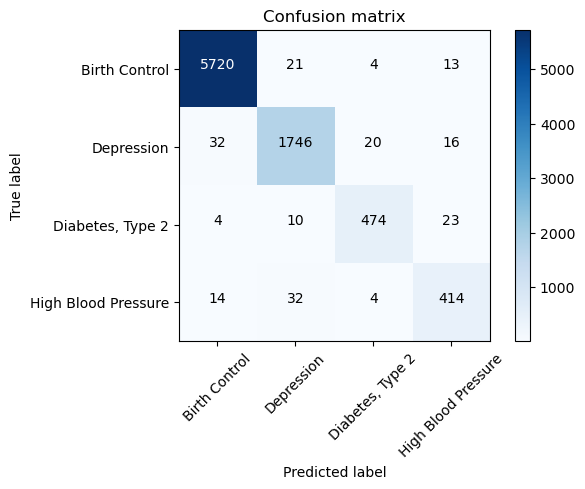

In [85]:
cm=metrics.confusion_matrix(y_test,pred_ptf,labels= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])
plot_confusion_matrix(cm, classes= ["Birth Control","Depression","Diabetes, Type 2","High Blood Pressure"])

# TFIDF: Bigrams

In [86]:
tfidf_vectorizer2=TfidfVectorizer(stop_words="english", max_df=0.8, ngram_range= (1,2)) # max_df will igonnre the word appering more than 80% in entire dataset. it means it is very common word 
tfidf_train_2 = tfidf_vectorizer2.fit_transform(x_train)
tfidf_test_2 = tfidf_vectorizer2.transform(x_test)

In [87]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


SyntaxError: invalid syntax (4159593689.py, line 6)

# Trigrams

In [ ]:
tfidf_vectorizer3=TfidfVectorizer(stop_words="english", max_df=0.8, ngram_range= (1,3)) # max_df will igonnre the word appering more than 80% in entire dataset. it means it is very common word 
tfidf_train_3 = tfidf_vectorizer3.fit_transform(x_train)
tfidf_test_3 = tfidf_vectorizer3.transform(x_test)

In [ ]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


# Important Features

In [ ]:
def most_informative_features(vectorizer,classifier,classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_name =vectorizer.get_feature_names()
    topn= sorted(zip(classifier.coef_[labelid],feature_name))[-n:]
    
    for coef, feat in topn:
        print(classlabel, feat,coef)


In [72]:
most_informative_features(tfidf_vectorizer,pass_tf,"Birth Control")

Birth Control bumping 0.4625802844526403
Birth Control overlooked 0.5288805737989883
Birth Control affter 0.5497812478727081
Birth Control cream 0.5567303077586506
Birth Control adjust 0.583179625168224
Birth Control coughed 0.5943764093080605
Birth Control thinking 0.743674170109857
Birth Control pubmed 0.7757287179104099
Birth Control competitor 1.3184857568774127
Birth Control fragmented 7.178461475228309


In [73]:
most_informative_features(tfidf_vectorizer,pass_tf,"Depression")

Depression similar 0.6150821719004391
Depression teenhood 0.6248919228133459
Depression betting 0.6310670518560951
Depression shot 0.6683575963826552
Depression stevia 0.6757575052127995
Depression shield 0.8631897604430901
Depression stole 1.1205735713402198
Depression appeared 1.1365734264693539
Depression assisting 1.3537229171841212
Depression allergy 4.107823255936195


In [74]:
most_informative_features(tfidf_vectorizer,pass_tf,"High Blood Pressure")

High Blood Pressure favorably 0.5454276558283354
High Blood Pressure favorite 0.5454276558283354
High Blood Pressure discriminatory 0.5490423089499196
High Blood Pressure endowed 0.5801444518875201
High Blood Pressure bathing 0.5838814815886928
High Blood Pressure endometriotic 0.5969266233845267
High Blood Pressure flowed 0.6170535210510844
High Blood Pressure enlightening 0.745846467049311
High Blood Pressure serotoin 0.7790619726731646
High Blood Pressure focusing 1.0420820540343225


In [76]:
most_informative_features(tfidf_vectorizer,pass_tf,"Diabetes, Type 2")

Diabetes, Type 2 uterine 0.34772210614786175
Diabetes, Type 2 overdrawn 0.34829225737748465
Diabetes, Type 2 focused 0.35048300992309694
Diabetes, Type 2 bc 0.35621724895184986
Diabetes, Type 2 proceedure 0.37303684644359497
Diabetes, Type 2 pristiq 0.43065422734862663
Diabetes, Type 2 open 0.6373801385635699
Diabetes, Type 2 formation 0.7072580795832725
Diabetes, Type 2 prison 0.8611368698536471
Diabetes, Type 2 presumably 3.2313207709794947


# Predictions

In [79]:
x.tail()

condition  \
161273  Birth Control         
161278  Diabetes, Type 2      
161286  Depression            
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
161273   I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.    
161278   I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me                                                                                                                                                                                                                                                                                                                                                                                                     
161286   This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                                                                                                                                                                                                           
161290   I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.                                                                                                                                                                                    
161291   This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(                                                                                                                                                                                                                            

                                                                                                              

In [88]:
text = ["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Depression'

In [89]:
text = ["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
test = tfidf_vectorizer.transform(text)
pred1 = pass_tf.predict(test)[0]
pred1

'Diabetes, Type 2'